# Time Dependent Partial Differential Equations
EP4210 Computational Physics


Schrodinger Equation
$$i \hbar \frac{\partial }{\partial t} \psi(x, t) = \frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \psi(x, t)$$
To solve this, we need $\psi(x, t=0)$ for all $x$ and the boundary condition
- $\psi(x=0, t)$ for all $t$
- $\psi(x=L, t)$ for all $t$

## Time dependent equations
Continuity Equation (this is first order in $x$ and $t$)
$$\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \mathbb{v}) = 0$$
In one dimensional space,
$$ \frac{\partial}{\partial t} \rho(x, t) + \frac{\partial}{\partial x} \rho u(x, t) = 0$$


If we integrate the above equation from $x=0$ to $x=L$ then
$$\int_0^L \frac{\partial}{\partial t} \rho(x, t) dx + \int_0^L \frac{\partial}{\partial x} \rho u(x, t) dx = 0$$
First term gives us: $ \displaystyle \int_0^L \frac{\partial}{\partial t} \rho(x, t) dx = \frac{d}{dt} \int_0^L \rho(x, t) dx$ 

This is the rate of change of mass per unit time along the region $x=0$ and $x=L$.

Second term gives us: $ \displaystyle \int_0^L \frac{\partial}{ \partial x} \rho u(x, t) dx = \rho u(L, t) - \rho u(0, t)$ 

This gives us the difference betweent the mass coming in $\rho u(0, t)$ and going out $\rho u(L, t)$.

The equation therefore is the law of conservation of mass. A general conservation law between a quantity $q$ and its flux $\phi_q$.
$$ \frac{\partial}{\partial t} q + \frac{\partial}{\partial x} \phi_q = 0$$
In three dimensions, we take the divergence operator $\nabla \cdot$ instead of $\frac{\partial}{\partial x}$


### Discretisation

$\rho_j^n = \rho(x_n, t^n)$
We take $x_j = j \Delta x$ and $t^n = n \Delta t$ 
If we now take $u$ as a constant then writing it in finite difference form, we will have:
$$\frac{\rho_j^{n+1}-\rho_{j}^{n}}{\Delta t} = -u \frac{\rho_{j+1}^n-\rho_{j-1}^n}{2 \Delta x}$$
$$\implies \frac{\partial}{\partial t} \rho(x_j, t^n)+ u \frac{\partial}{\partial x} \rho(x_j, t^n) + O(\Delta t) + O(\Delta x^2)$$
Forward difference in time, central difference in space.
$$\rho_{j}^{n+1} = \rho_j^n - \frac{u\Delta t}{2 \Delta x}(\rho_{j+1}^{n} - \rho_{j-1}^{n})$$
This is an explicit scheme, we can calculate $\rho_{j}^{n+1}$ without needing to know $\rho_{j}^{n+1}$, only $\rho_j^n$ and the values of $\rho$ at the previous time step. This is also known as forward Euler method.
We may write the solution as matrix:
$$
\begin{bmatrix} 
\rho_1^{n+1} \\ 
\rho_2^{n+1} \\ 
\rho_3^{n+1} \\ 
\vdots \\ 
\rho_N^{n+1} 
\end{bmatrix} 
= 
\begin{bmatrix} 
1  & -\frac{u\Delta t}{2 \Delta x} & 0 & \cdots & 0 \\ 
\frac{u\Delta t}{2 \Delta x} & 1  & -\frac{u\Delta t}{2 \Delta x} & \cdots & 0 \\ 
0 & \frac{u\Delta t}{2 \Delta x} & 1 & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
0 & 0 & 0 & \cdots & 1 
\end{bmatrix} 
\begin{bmatrix} 
\rho_1^n \\ 
\rho_2^n \\ 
\rho_3^n \\ 
\vdots \\ 
\rho_N^n 
\end{bmatrix}
$$
Here the propagation of $\rho$ is $\rho^{n+1} = P \rho^n$, meaning that $\rho^n = P^n \rho^0$.

The norm of the vector $\rho^n$ is defined as $\|\rho^n\| = \sqrt{\sum_{j=1}^{N} \rho_j^{2}}$, and the norm of the matrix.

As n becomes large, the norm tends to the spectral radius of the P matrix $S(P)$.
The spectral radius is the maximum of the absolute values of the eigenvalues of the matrix $P, S(P) = max(\lambda_i)$.
We see that $S(P) > 1$, so this implies that the $\rho$ will keep increasing to $\infty$. The solution beyond a point may not be physically meaningful.

## Periodic Boundary Conditions
We can apply periodic boundary conditions to the system by adding a second copy of the system to the right of the first one, and then applying the boundary conditions at the right edge of the second copy. This is equivalent to applying periodic boundary conditions to the original system. 
$$\rho_0^{n+1} = \rho_N^{n+1}$$
$$\rho_1^{n+1} = \rho_{N+1}^{n+1}$$
$$\rho^{n+1} = 
\begin{bmatrix} 
\rho_1^{n+1} \\ 
\rho_2^{n+1} \\ 
\rho_3^{n+1} \\ 
\vdots \\ 
\rho_N^{n+1} 
\end{bmatrix} 
= 
\begin{bmatrix} 
1  & -\frac{u\Delta t}{2 \Delta x} & 0 & \cdots & -\frac{u\Delta t}{2 \Delta x} \\ 
\frac{u\Delta t}{2 \Delta x} & 1  & -\frac{u\Delta t}{2 \Delta x} & \cdots & 0 \\ 
0 & \frac{u\Delta t}{2 \Delta x} & 1 & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
\frac{u\Delta t}{2 \Delta x} & 0 & 0 & \cdots & 1 
\end{bmatrix} 
\begin{bmatrix} 
\rho_1^n \\ 
\rho_2^n \\ 
\rho_3^n \\ 
\vdots \\ 
\rho_N^n 
\end{bmatrix}
$$

In [12]:
import numpy as np
u = 0.1
dt = 0.001
N = 1000
a, b = 0, 1

x_full = np.linspace(a, b, N+2, dtype=np.float64)
x = x_full[1:-1]
dx = x[1]-x[0]


In [13]:

P = np.diag(np.ones(N-1)*(u*dt/(2*dx)), -1) + np.diag(np.ones(N), 0) + np.diag(np.ones(N-1)*(-u*dt/(2*dx)), 1)
P[0, N-1] = -u*dt/(2*dx)
P[N-1, 0] = u*dt/(2*dx)
P

array([[ 1.     , -0.05005,  0.     , ...,  0.     ,  0.     , -0.05005],
       [ 0.05005,  1.     , -0.05005, ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.05005,  1.     , ...,  0.     ,  0.     ,  0.     ],
       ...,
       [ 0.     ,  0.     ,  0.     , ...,  1.     , -0.05005,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.05005,  1.     , -0.05005],
       [ 0.05005,  0.     ,  0.     , ...,  0.     ,  0.05005,  1.     ]])

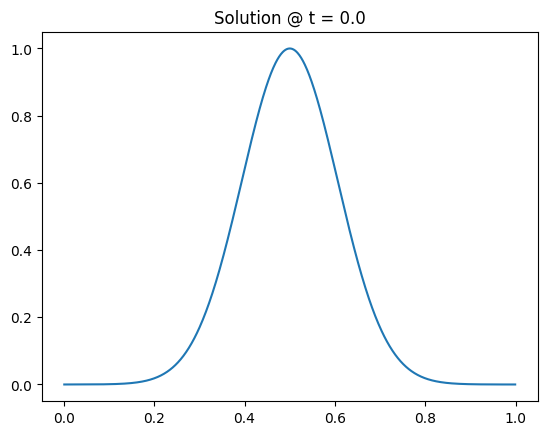

0.0


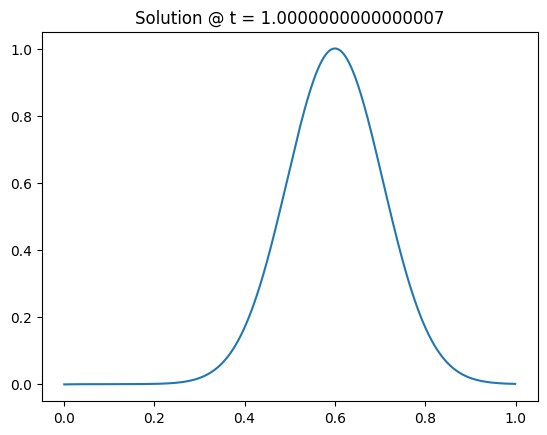

1.0000000000000007


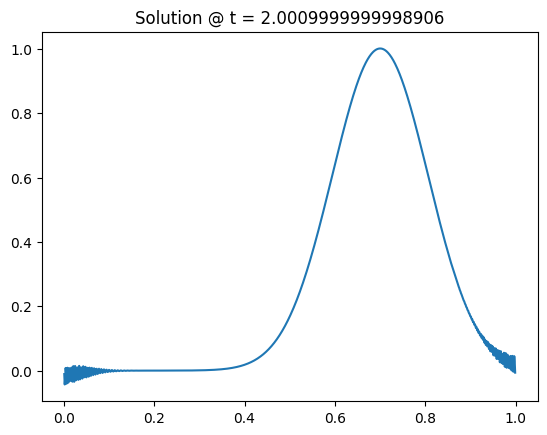

2.0009999999998906


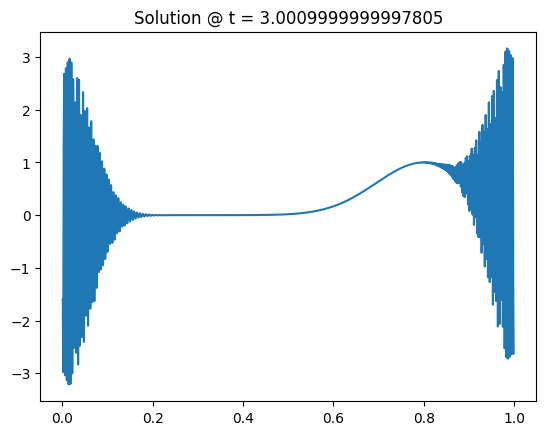

3.0009999999997805


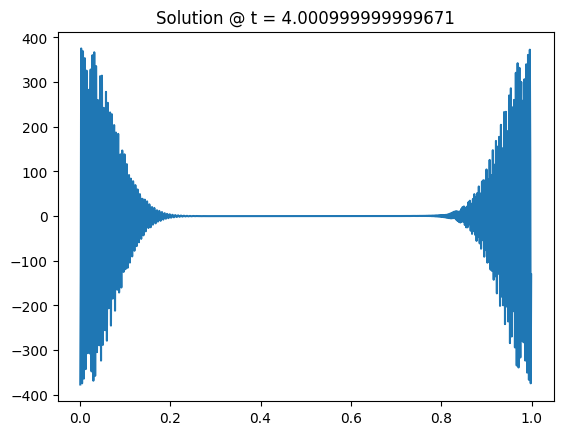

4.000999999999671


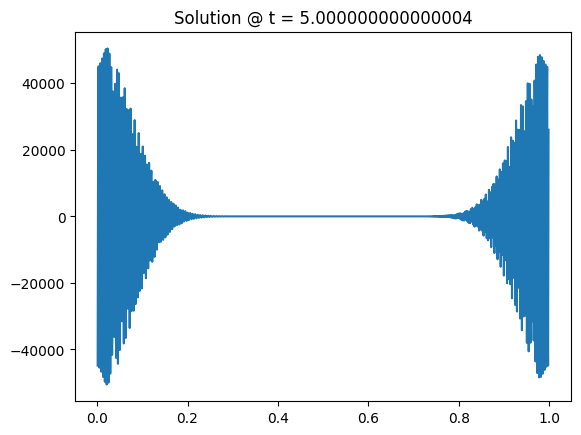

5.000000000000004


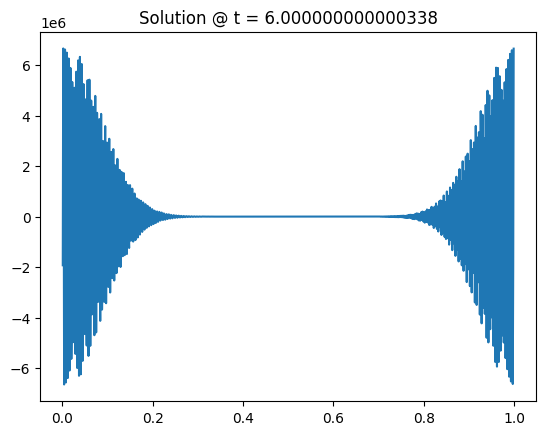

6.000000000000338


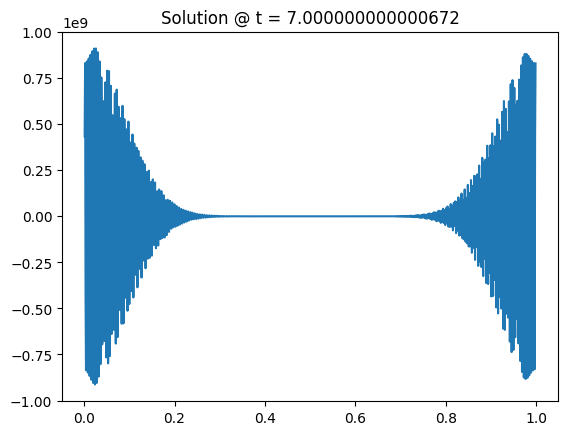

7.000000000000672


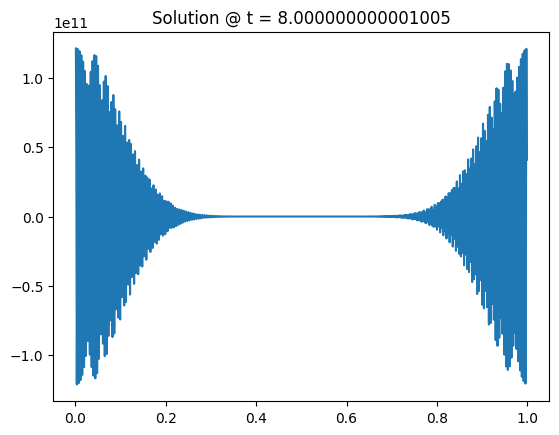

8.000000000001005


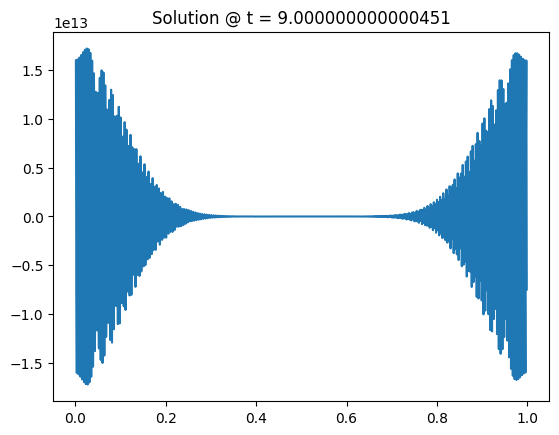

9.000000000000451


In [14]:
import math
import matplotlib.pyplot as plt

rho0 = np.exp(-1.0*((x-0.5)/0.15)**2)

t = 0.
rho = rho0.copy()
soln=[]
while t < 10:
    rho = P@rho
    #rho = np.copy(rho1)
    if t%1.0 < 1E-3  :
        soln.append(rho)
        plt.plot(x, rho)
        plt.title(f"Solution @ t = {t}")
        plt.show()
        print(t)
    t += dt

An improvement to the previous solution by changing the extra terms added

In [23]:
import numpy as np
u = 0.1
dt = 0.001
N = 1000
a, b = 0, 1

x_full = np.linspace(a, b, N+2, dtype=np.float64)
x = x_full[1:-1]
dx = x[1]-x[0]


P = np.diag(np.ones(N-1)*(u*dt/(2*dx)), -1) + np.diag(np.ones(N), 0) + np.diag(np.ones(N-1)*(-u*dt/(2*dx)), 1)
P[0, N-1] = -1
P[N-1, 0] = 1
P

array([[ 1.     , -0.05005,  0.     , ...,  0.     ,  0.     , -1.     ],
       [ 0.05005,  1.     , -0.05005, ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.05005,  1.     , ...,  0.     ,  0.     ,  0.     ],
       ...,
       [ 0.     ,  0.     ,  0.     , ...,  1.     , -0.05005,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.05005,  1.     , -0.05005],
       [ 1.     ,  0.     ,  0.     , ...,  0.     ,  0.05005,  1.     ]])

In [ ]:
import math
import matplotlib.pyplot as plt

rho0 = np.exp(-1.0*((x-0.5)/0.15)**2)

t = 0.
rho = rho0.copy()
while t < 10:
    rho = P@rho
    #rho = np.copy(rho1)
    if t%1.0 < 1E-3  :
        plt.plot(x, rho)
        plt.title(f"Solution @ t = {t}")
        plt.show()
        print(t)
    t += dt

The method is unstable as seen from the results. So we move to Implicit Euler Method.
$$\rho_{j}^{n+1} = \rho_j^n - \frac{u\Delta t}{2 \Delta x}(\rho_{j+1}^{n+1} - \rho_{j-1}^{n+1})$$
We express the current timestep in terms of the $n+1$ th time step. Earlier we had
$$\rho^{n+1} = P \rho^n$$
Now we have
$$\rho^{n} = P \rho^{n+1} \implies \rho^{n+1} = P^{-1} \rho^n$$

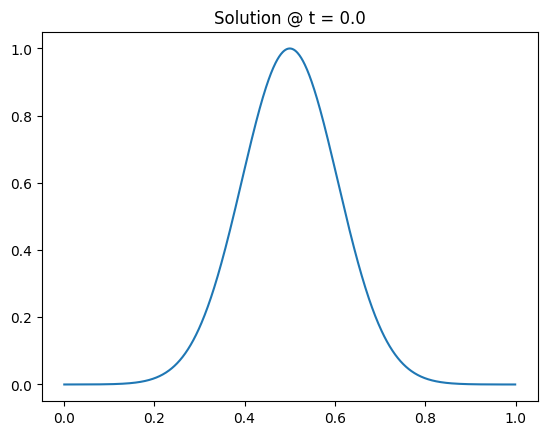

0.0


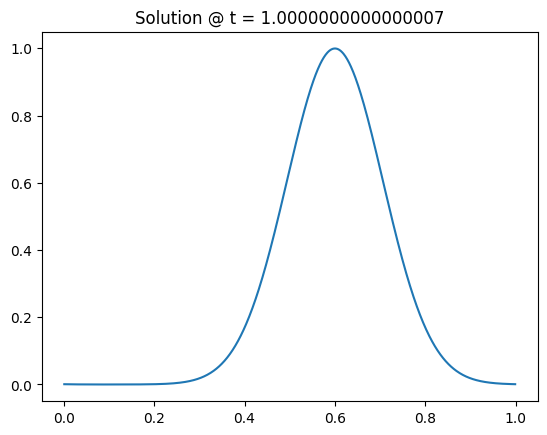

1.0000000000000007


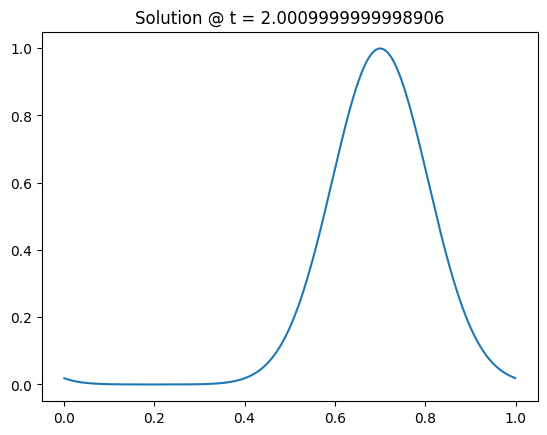

2.0009999999998906


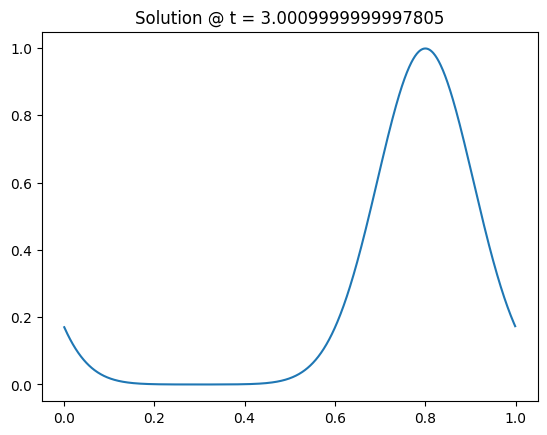

3.0009999999997805


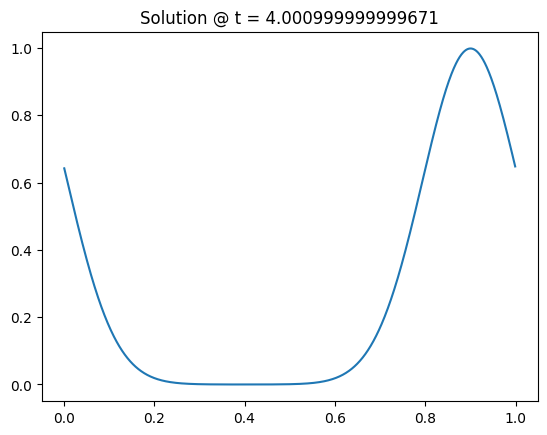

4.000999999999671


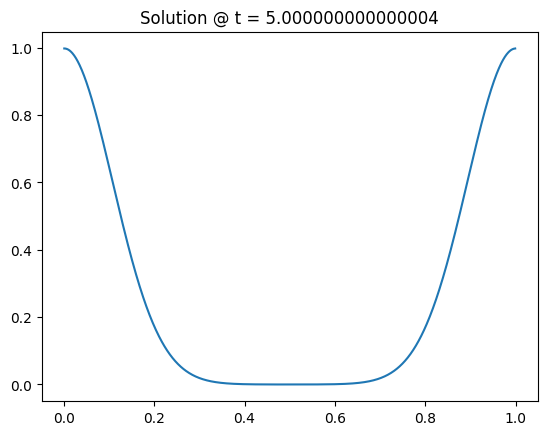

5.000000000000004


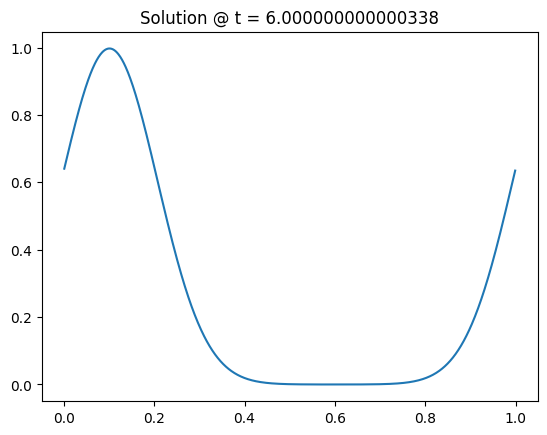

6.000000000000338


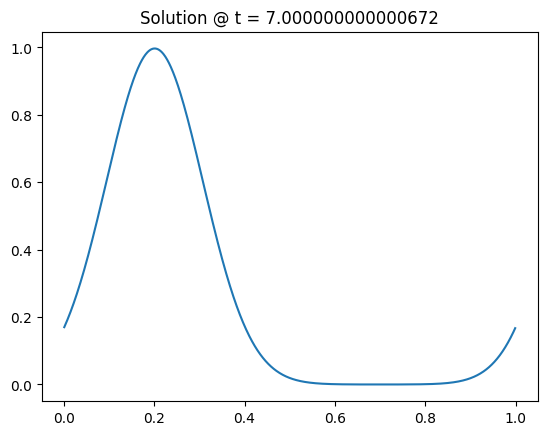

7.000000000000672


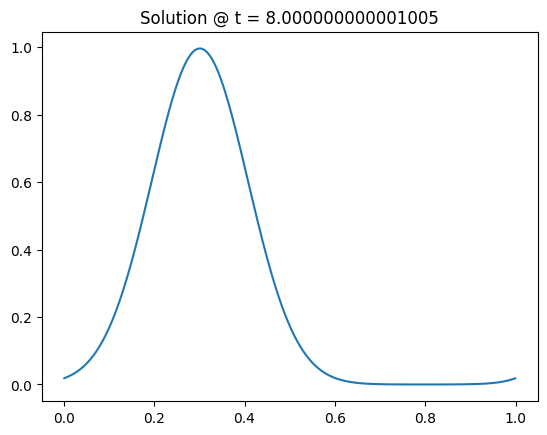

8.000000000001005


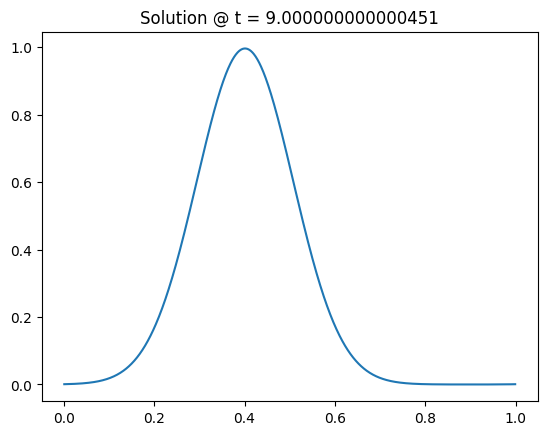

9.000000000000451


In [30]:
from scipy.linalg import inv 
u = 0.1
dt = 0.001
N = 1000
a, b = 0, 1

x_full = np.linspace(a, b, N+2, dtype=np.float64)
x = x_full[1:-1]
dx = x[1]-x[0]


P = np.diag(np.ones(N-1)*(-u*dt/(2*dx)), -1) + np.diag(np.ones(N), 0) + np.diag(np.ones(N-1)*(u*dt/(2*dx)), 1)
P[0, N-1] = -u*dt/(2*dx)
P[N-1, 0] = u*dt/(2*dx)

T = inv(P)

import math
import matplotlib.pyplot as plt

rho0 = np.exp(-1.0*((x-0.5)/0.15)**2)

t = 0.
rho = rho0.copy()
while t < 10:
    rho = T@rho
    #rho = np.copy(rho1)
    if t%1.0 < 1E-3  :
        plt.plot(x, rho)
        plt.title(f"Solution @ t = {t}")
        plt.show()
        print(t)
    t += dt


In [28]:
P

array([[ 1.     , -0.05005,  0.     , ...,  0.     ,  0.     , -0.05005],
       [ 0.05005,  1.     , -0.05005, ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.05005,  1.     , ...,  0.     ,  0.     ,  0.     ],
       ...,
       [ 0.     ,  0.     ,  0.     , ...,  1.     , -0.05005,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.05005,  1.     , -0.05005],
       [ 0.05005,  0.     ,  0.     , ...,  0.     ,  0.05005,  1.     ]])

# Lax-Friedrichs scheme

$$\rho_j^{n+1} = \frac 1 2 (\rho_{j-1}^{n} + \rho_{j+1}^{n}) - u \frac {\Delta t}{2 \Delta x} (\rho_{j+1}^{n}-\rho_{j-1}^{n})$$
The current step is taken as the average of the two previous steps. This is a first order scheme. The Lax-Friedrich s scheme is a simple and stable scheme, but it is not very accurate.
$$\rho^{n+1} = 
\begin{bmatrix} 
\rho_1^{n+1} \\ 
\rho_2^{n+1} \\ 
\rho_3^{n+1} \\ 
\vdots \\ 
\rho_N^{n+1} 
\end{bmatrix} 
= 
\begin{bmatrix} 
0  & \frac 1 2 -\frac{u\Delta t}{2 \Delta x} & 0 & \cdots & 0 \\ 
\frac 1 2 + \frac{u\Delta t}{2 \Delta x} & 0  & \frac 1 2 -\frac{u\Delta t}{2 \Delta x} & \cdots & 0 \\ 
0 & \frac 1 2 + \frac{u\Delta t}{2 \Delta x} & 0 & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
0 & 0 & \cdots & \frac 1 2 + \frac{u\Delta t}{2 \Delta x} & 0
\end{bmatrix} 
\begin{bmatrix} 
\rho_1^n \\ 
\rho_2^n \\ 
\rho_3^n \\ 
\vdots \\ 
\rho_N^n 
\end{bmatrix}
$$
If we take a $2\times 2$ submatrix of the matrix, we get the following matrix:
$$\begin{bmatrix}
-\lambda & \frac 1 2 -\frac{u\Delta t}{2 \Delta x} \\
\frac 1 2 + \frac{u\Delta t}{2 \Delta x} & -\lambda
\end{bmatrix}$$
For this matrix to be stable, we need to have $|\lambda| \le 1$.
$$\implies -3 \le \frac{u\Delta t}{\Delta x} \le 5$$
This is the CFL condition for the Lax-Friedrichs scheme. The CFL condition is a necessary condition for the stability of the scheme. If the CFL condition is not satisfied, the scheme will be unstable. The CFL condition is a necessary but not sufficient condition for the stability of the scheme.
$$\Delta t \le \frac {\Delta x}{|u|}$$
$$\Delta t \le C_N \frac {\Delta x}{|u|}$$
$C_N$ is the Courant number or the safety factor.

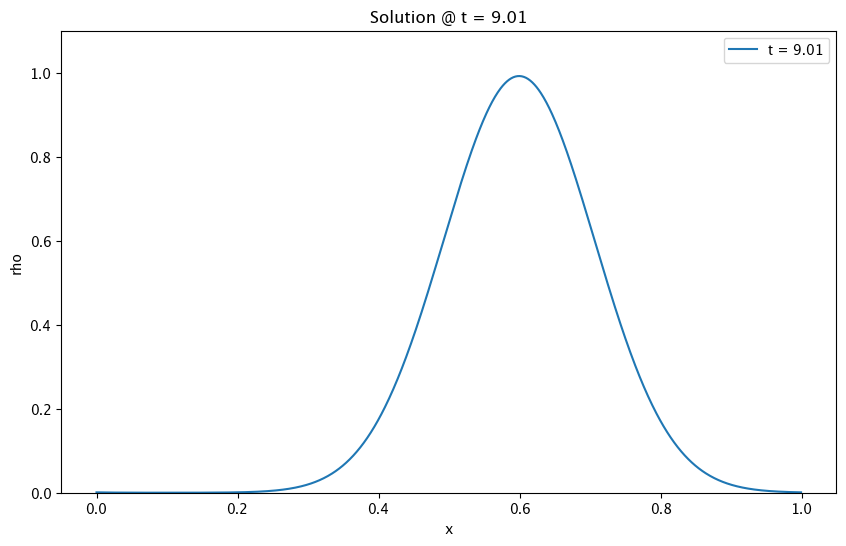

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Parameters
u = 0.1  # advection velocity
N = 1000  # number of spatial points
a, b = 0, 1  # domain boundaries
T = 10  # total simulation time

# Spatial discretization
x = np.linspace(a, b, N, endpoint=False)
dx = x[1] - x[0]

# Time step (satisfying CFL condition)
dt = 0.8 * dx / abs(u)  # 0.8 is a safety factor
nt = int(T / dt)  # number of time steps

# Initial condition
rho0 = np.exp(-1.0*((x-0.5)/0.15)**2)

# Upwind scheme matrix
if u > 0:
    P = np.eye(N) - (u*dt/dx) * (np.eye(N) - np.roll(np.eye(N), 1, axis=1))
else:
    P = np.eye(N) + (u*dt/dx) * (np.roll(np.eye(N), -1, axis=1) - np.eye(N))

# Time evolution
rho = rho0.copy()
t = 0
plt.figure(figsize=(10, 6))
for n in range(nt):
    rho = P @ rho
    t += dt
    
    if math.isclose(t % 1, 0, abs_tol=1e-2):
        plt.clf()
        plt.plot(x, rho, label=f't = {t:.2f}')
        plt.title(f"Solution @ t = {t:.2f}")
        plt.xlabel('x')
        plt.ylabel('rho')
        plt.legend()
        plt.ylim(0, 1.1*max(rho0))
        #plt.pause(0.1)

plt.show()


## Non Linear Methods
When we have a varying density because of which we cannot take out rho as const in the equation of continuity.
Navier Stokes Equation, Burger's Equation
$$\rho_0^n = \rho_1^n \ \& \ \rho_{N+1}^n = \rho_N^n$$

## Lax-Wendroff Method
We also evaluate the second term in the series expansion.
$$\rho(x, t+\Delta t) = \rho(x, t) + \Delta t \frac{\partial}{\partial t} \rho + \frac {\Delta t^2}{2} \frac{\partial^2}{\partial t^2} \rho + O(\Delta t^3)$$
$$\frac{\partial \rho}{\partial t} = -u \frac{\partial \rho}{\partial x} \implies \frac{\partial^2 \rho}{\partial t^2} = u^2 \frac{\partial^2 \rho}{\partial x^2} $$

$$\rho(x, t+\Delta t) = \rho(x, t) + u \Delta t \frac{\partial \rho}{\partial x}  + u^2 \frac {\Delta t^2}{2} \frac{\partial^2 \rho}{\partial x^2} + O(\Delta t^3)$$
We will first define a halfway point
$$\rho_{j+\frac 1 2}^{n+\frac 1 2} = \frac 1 2 (\rho_j^n + \rho_{j+1}^n) - \frac {\Delta t} {2 \Delta x}(\rho_{j+1}^n u_{j+1}^n - \rho_j^n u_j^n)$$
The full step is taken using this half step.
$$\rho_{j}^{n+1} = \rho_j^n - \frac {\Delta t} {\Delta x}(\rho_{j+\frac 1 2}^{n+\frac 1 2} u_{j+\frac 1 2}^{n+\frac 1 2} - \rho_{j-\frac 1 2}^{n+\frac 1 2} u_{j-\frac 1 2}^{n+\frac 1 2}) $$

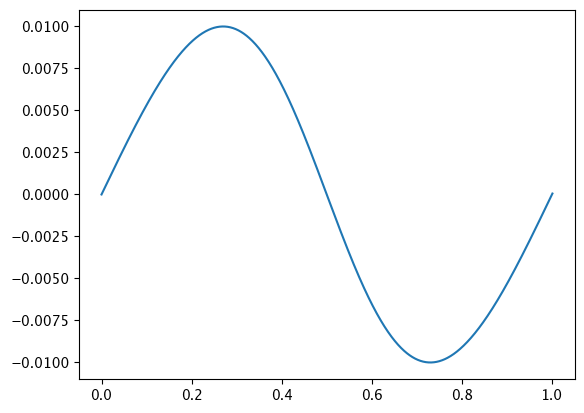

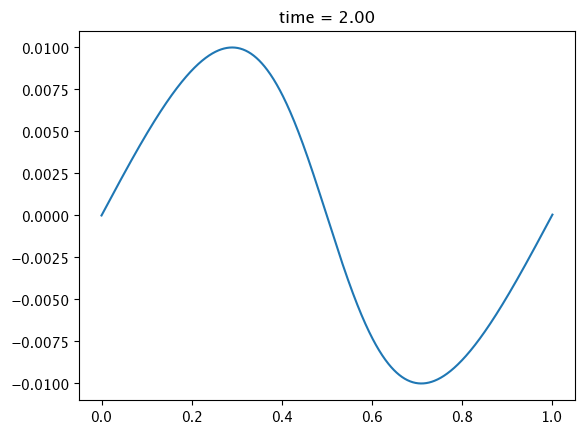

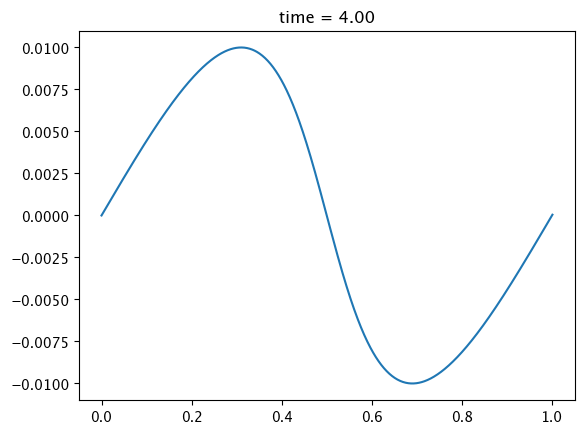

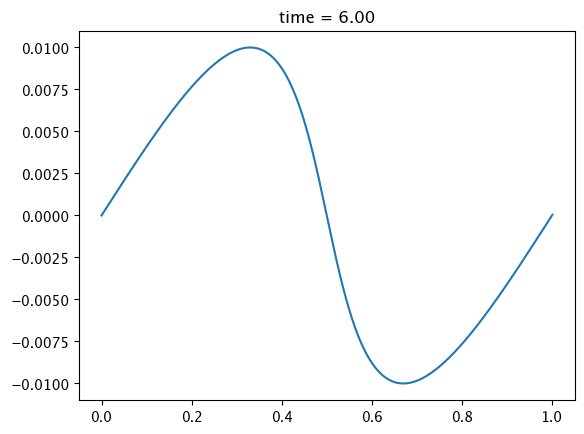

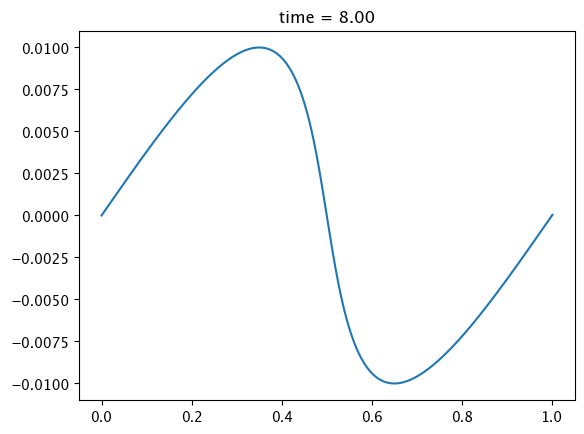

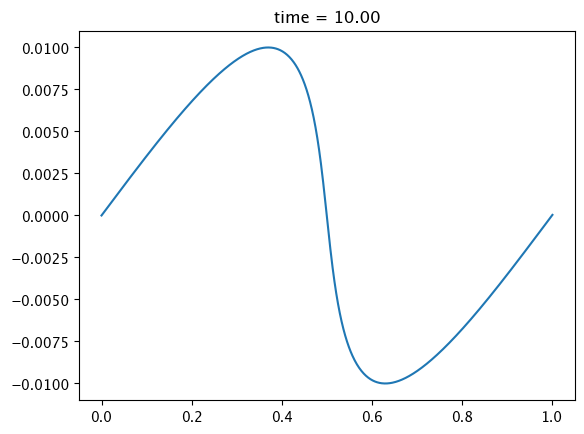

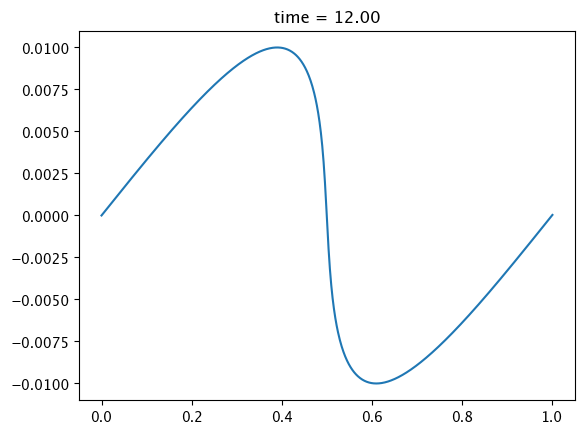

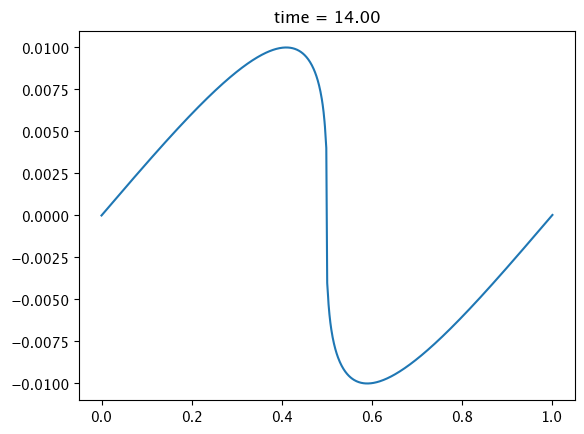

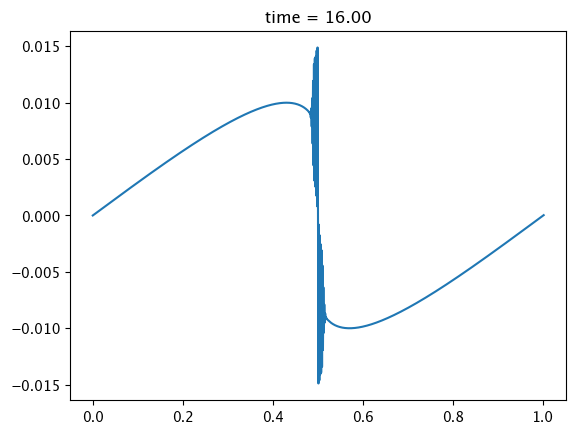

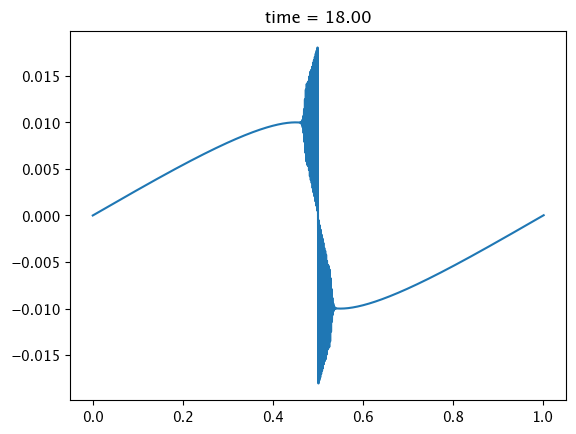

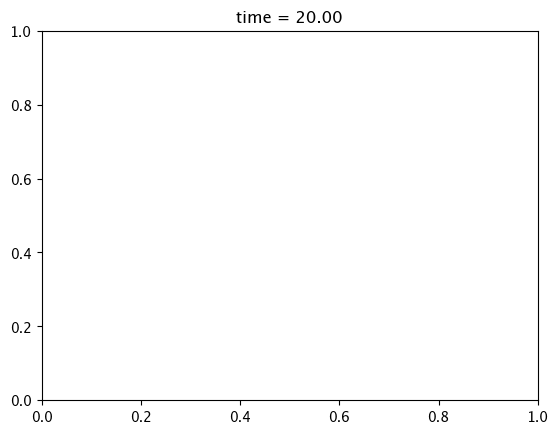

In [2]:
import matplotlib.pyplot as plt
import numpy as np

a, b = 0, 1
N = 1000

dx = (b-a)/N
x = np.linspace(a, b+dx, N+2)

dt = 0.001
T = 20
t = 0

rho = 0.01*np.sin(2*np.pi*x)
u = rho/2

while t < T:
    rho_half = np.zeros(N)
    rho_half = 0.5*(rho[:-1]+rho[1:]) - (dt/(4*dx))*(rho[1:]**2-rho[:-1]**2)
    # for i in range(1, len(rho_half)-1):
    #     rho_half[i] = (rho[i] + rho[i+1])/2 - (2*dt/dx)*(rho[i+1]*u[i+1] - rho[i]*u[i])
    # rho_half[-1] = rho[-1]

    rho_new = np.zeros(N+2)
    # for i in range(1, len(rho)-1):
    #     rho[i] = rho_half[i] - (dt/dx)*(rho_half[i+1] - rho_half[i-1])
    rho_new[1:-1] = rho[1:-1] - (dt/(2*dx)) * (rho_half[1:]**2 - rho_half[:-1]**2)
    rho_new[0] = rho_new[-2]
    rho_new[-1] = rho_new[1]

    rho = rho_new.copy()

    t += dt

    if t % 2 < dt:
        plt.plot(x, rho)
        plt.show()
        plt.title(f'time = {t:0.2f}')

# Implicit-Explicit Methods
In implicit methods, the norm of the solution keeps decreasing at each step because there is an inbuilt diffusion equation. So we can take the average of implicit and explicit step to get a better approximations.

# Schrodinger Equation
$$i \hbar \frac{\partial}{\partial t}\psi = \hat H \psi(x, t)$$
The probability of finding the particle in region $[x, x+dx]$ is $|\psi(x, t)|^2 dx$, therefore $\int_0^a |\psi(x, t)|^2 dx = 1$. 


This is the L2 norm and it is conserved.

$$\hat H = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)$$
As $\hbar, m$ are very small numbers, the overall evaluation will be a very small number. Precision will be lost by truncations.

Say we have our domain $[0, a]$. We take $q = \frac s a$, $t_0 = \frac{2ma^2}{\hbar}$,
$t = s t_0$ and $\tilde V = \frac{2ma^2}{\hbar^2}V$ 
$$i \frac{\partial \tilde \psi}{\partial s}  = -\frac{\partial^2 \tilde \psi}{\partial q^2}  + \tilde V \tilde \psi$$
is the simplified or normalised Schrodinger equation.
$$\frac{\partial^2 \tilde \psi^n_j}{\partial q^2} = \frac{\tilde \psi_{j+1}^n- 2 \tilde\psi_j^n+ \tilde \psi_{j-1}^n}{\Delta q^2} + O(\Delta q^2)$$

## Crank Nicolson
$$\frac{\partial \tilde \psi^n_j}{\partial s } = \frac{\tilde \psi_{j}^{n+1}-  \tilde \psi_{j}^n}{ \Delta s}$$
$$\frac{\Psi^{n+1} - \Psi^n}{\Delta s} = -i(-D+P) \Psi^n $$